In [1]:
# Import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

In [2]:
# Ignore warnings

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Create function to print bold text

def print_bold(text):
    bold_start="\033[1m"
    bold_end="\033[0m"
    print(f"{bold_start}{text}{bold_end}")

In [4]:
# Create function to print the main information about a dataset

def summary_df(dataset):
    # First 5 rows of the dataset 
    print_bold("First 5 rows of the dataset:")
    print(dataset.head(), "\n")

    # Dataset dimensions (rows, columns) 
    print_bold("Dataset dimensions (rows, columns):")
    print(dataset.shape, "\n")

    # Variables in the dataset 🧩
    print_bold(" Variables in the dataset:")
    for i, col in enumerate(dataset.columns, 1):
        print(f"{i}) {col}")
    print()

    # Dataset info 
    print_bold("Dataset info:")
    print(dataset.info())
    print()

    # Descriptive statistics 
    print_bold("Descriptive statistics:")
    print(dataset.describe(include='all'))
    print()

    # Missing values per column 
    print_bold("Missing values per column:")
    print(dataset.isnull().sum())
    print()

    # Data types 
    print_bold("Data types:")
    print(dataset.dtypes)
    print()

In [5]:
# Import the dataset
# which can be found on kaggle.com
# https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset
main_df = pd.read_csv("/Users/lorenzograssi/Desktop/Projects/Spotify/data.csv")

# Print information about the dataset
summary_df(main_df) 

First 5 rows of the dataset:
   valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
2       500062   0.166         0  1o6I8BglA6ylDMrIELygv1          0.913000   
3       210000   0.309         0 

In [6]:
# Erase some variables we are not interested in 
main_df.drop(["id", "release_date", "liveness"], axis=1, inplace=True)

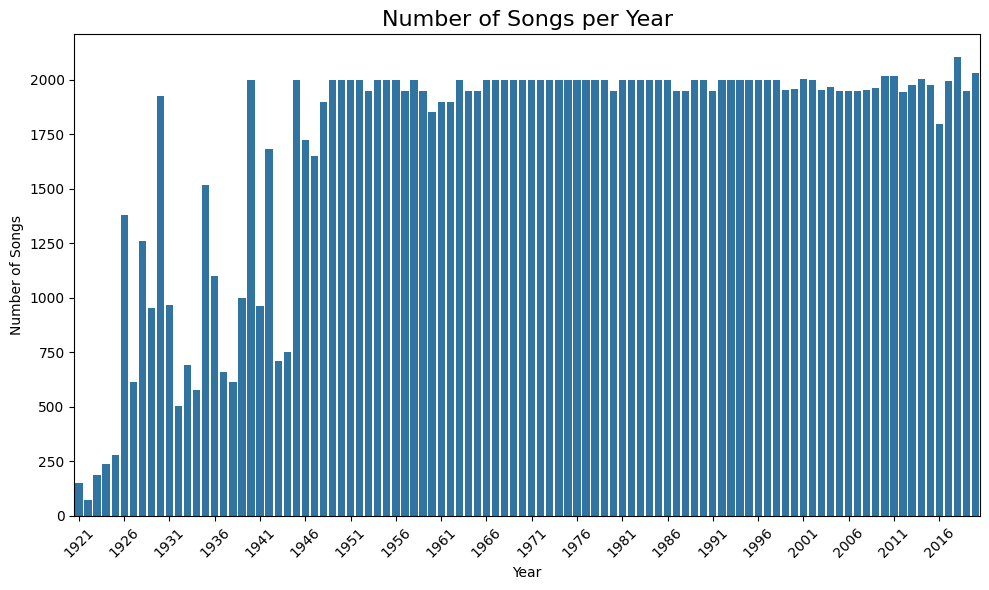

In [7]:
# Show how many songs we have per year

plt.figure(figsize=(10, 6))
sns.countplot(data=main_df, x="year")

plt.title("Number of Songs per Year", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Number of Songs")

# Show only one label every 5 years
xticks = plt.gca().get_xticks()
xtick_labels = plt.gca().get_xticklabels()
plt.xticks(
    ticks=[i for i in range(len(xtick_labels)) if i % 5 == 0],
    labels=[label.get_text() for i, label in enumerate(xtick_labels) if i % 5 == 0],
    rotation=45
)

plt.tight_layout()
plt.show()

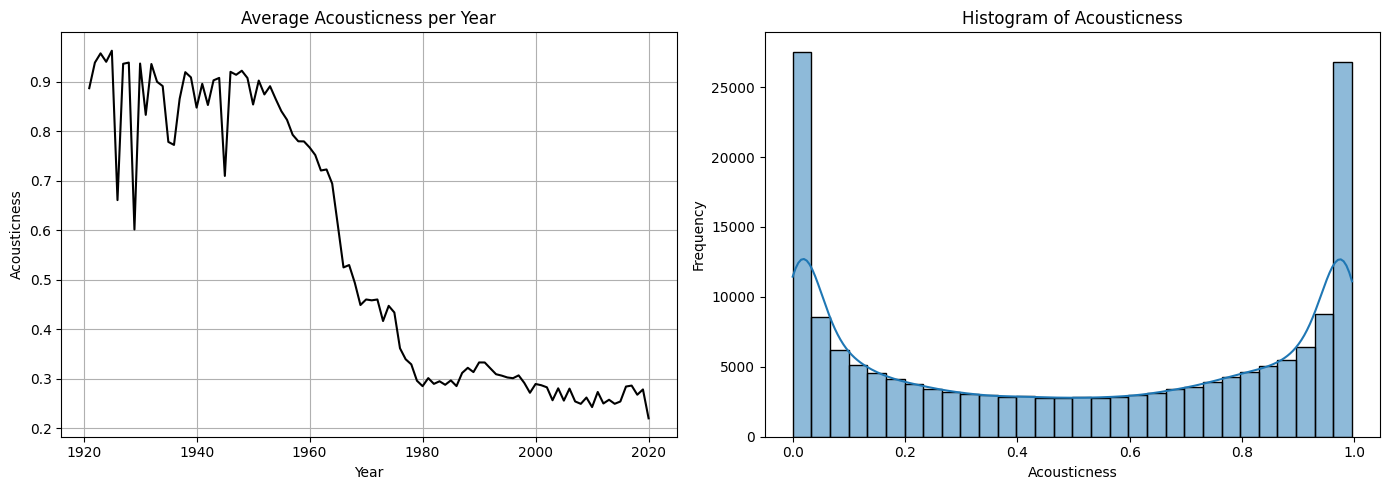

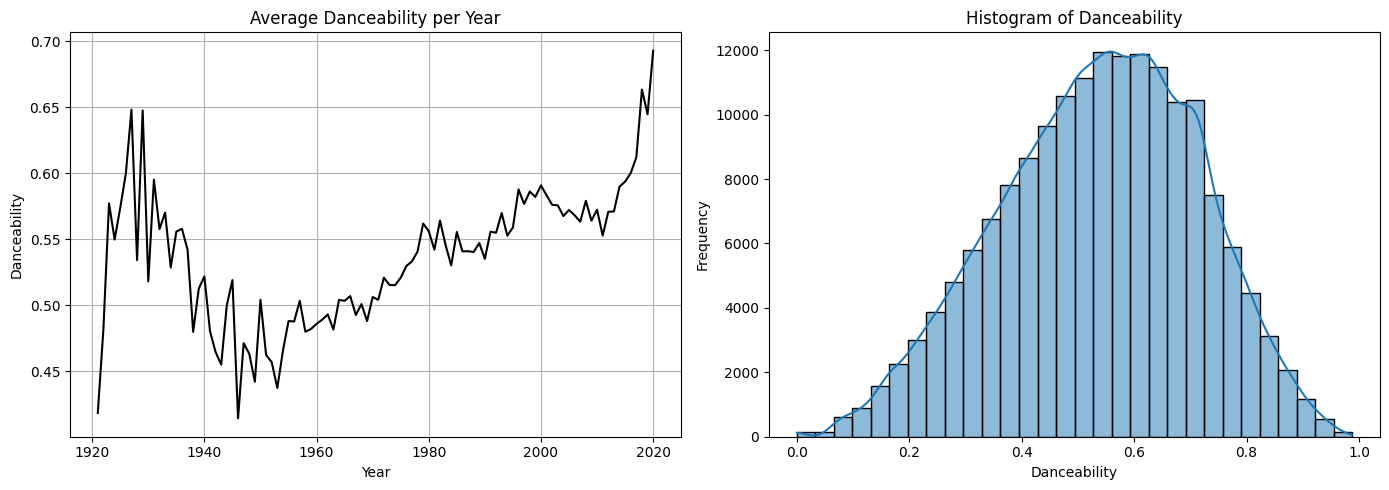

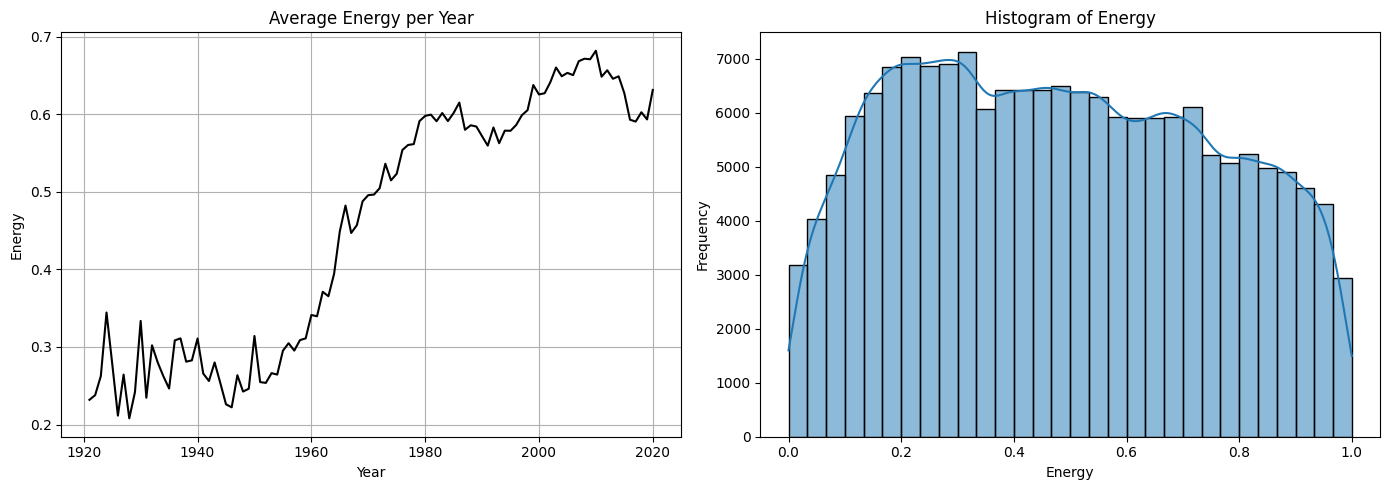

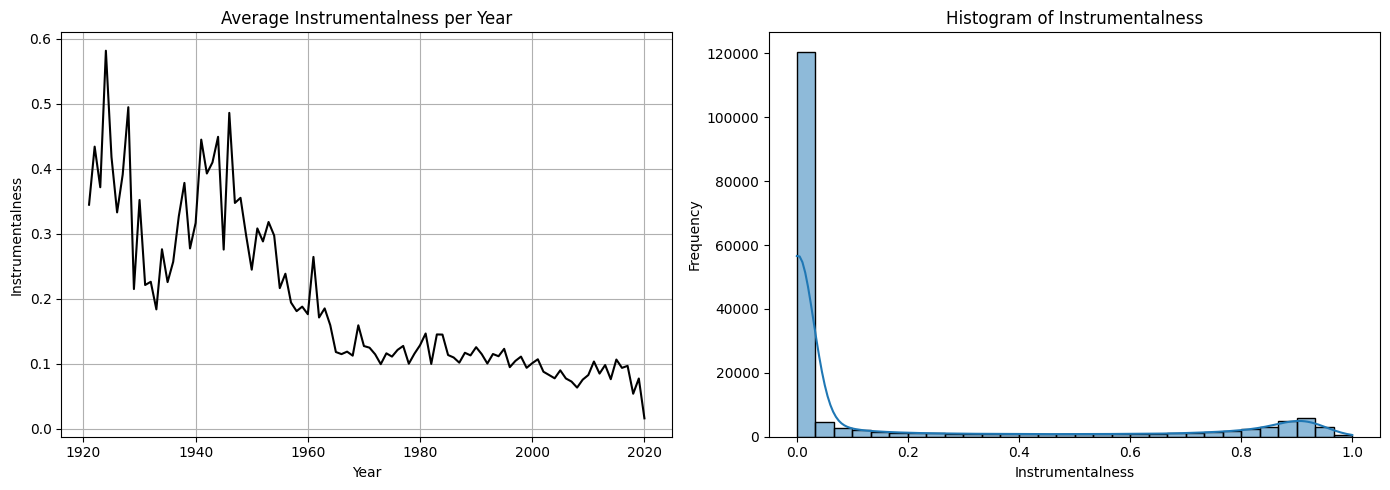

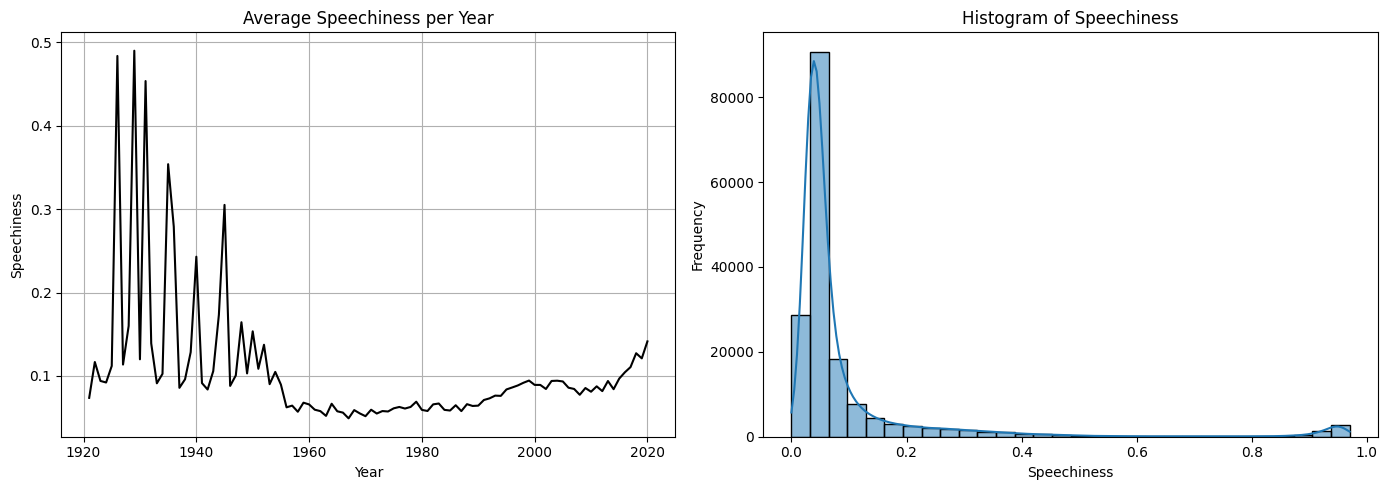

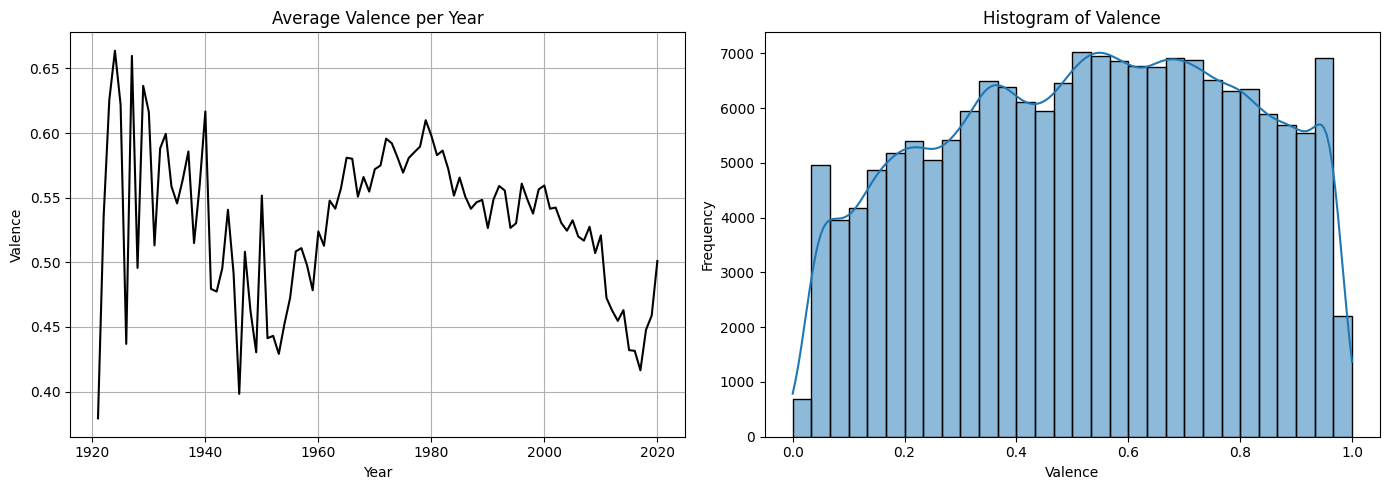

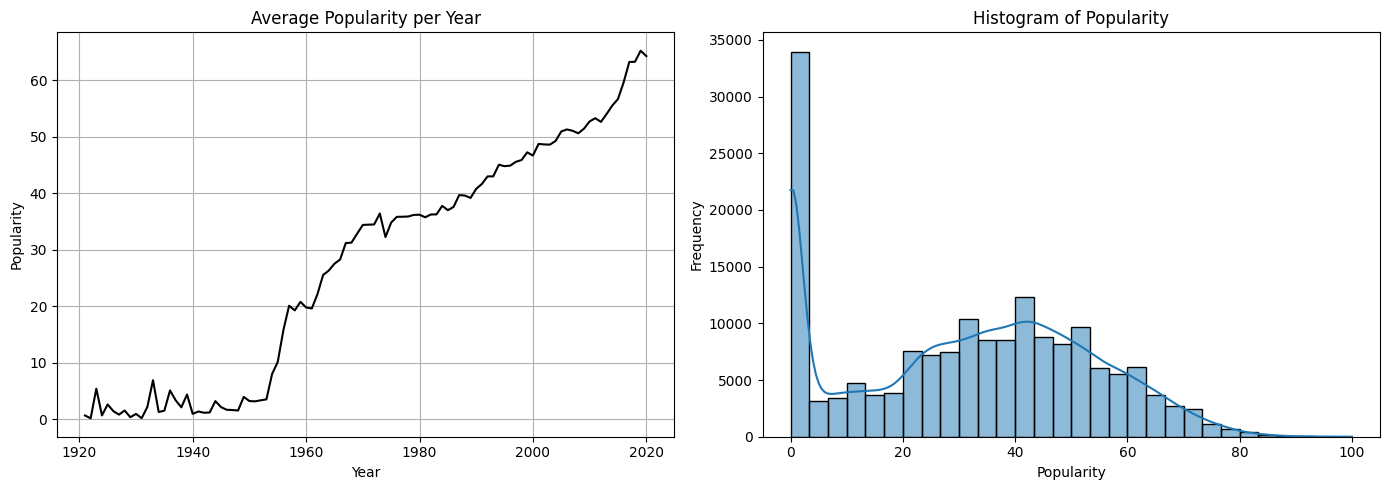

In [8]:
# Select the variables we want to visualize
arrElements = ["acousticness", "danceability", "energy", "instrumentalness", "speechiness", "valence", "popularity"]

def plot_combined_feature(df, feature):
    """
    Creates two side-by-side plots:
    1. The average trend of the feature over time (by year)
    2. The histogram of the feature's distribution
    """
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

    # Plot 1: Yearly average
    df.groupby("year")[feature].mean().plot(ax=axs[0], color="black")
    axs[0].set_title(f"Average {feature.capitalize()} per Year")
    axs[0].set_xlabel("Year")
    axs[0].set_ylabel(feature.capitalize())
    axs[0].grid(True)

    # Plot 2: Histogram of distribution
    sns.histplot(df[feature], bins=30, kde=True, ax=axs[1])
    axs[1].set_title(f"Histogram of {feature.capitalize()}")
    axs[1].set_xlabel(feature.capitalize())
    axs[1].set_ylabel("Frequency")

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

# Loop through each feature and generate the plots
for el in arrElements:
    plot_combined_feature(main_df, el)


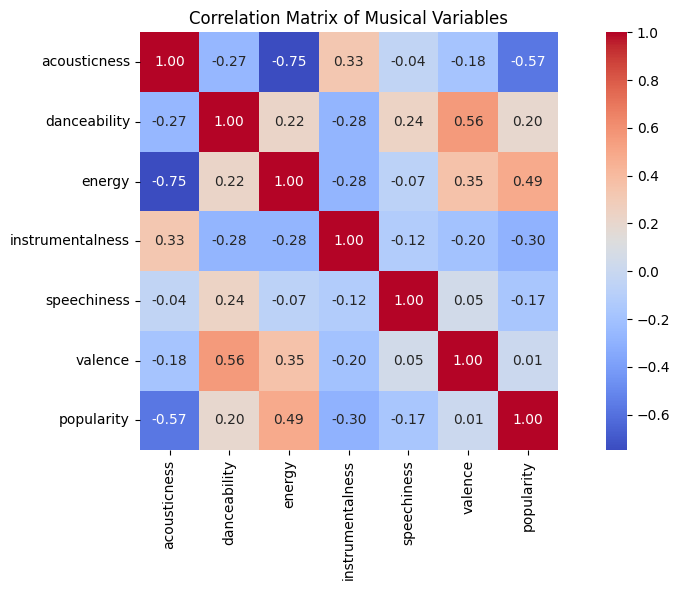

In [9]:
# plot the correlation matrix for the variables in arrElements

plt.figure(figsize=(10, 6))
sns.heatmap(main_df[arrElements].corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix of Musical Variables")
plt.tight_layout()
plt.show()

In [10]:
# Sort by descending popularity and select the top 20
top_songs = main_df.sort_values(by="popularity", ascending=False).head(20)

print_bold("🎵 Ranking: The 20 Most Popular Songs in the Dataset 🎵\n")

for idx, row in enumerate(top_songs.itertuples(), 1):
    song = row.name
    artist = row.artists
    year = row.year if "year" in top_songs.columns else "N/A"
    score = row.popularity
    print(f"{idx}) '{song}' by {artist} ({year}) - Popularity score: {score}")

🎵 Ranking: The 20 Most Popular Songs in the Dataset 🎵

1) 'Dakiti' by ['Bad Bunny', 'Jhay Cortez'] (2020) - Popularity score: 100
2) 'Mood (feat. iann dior)' by ['24kGoldn', 'iann dior'] (2020) - Popularity score: 99
3) 'Dynamite' by ['BTS'] (2020) - Popularity score: 97
4) 'WAP (feat. Megan Thee Stallion)' by ['Cardi B', 'Megan Thee Stallion'] (2020) - Popularity score: 96
5) 'positions' by ['Ariana Grande'] (2020) - Popularity score: 96
6) 'What You Know Bout Love' by ['Pop Smoke'] (2020) - Popularity score: 96
7) 'Blinding Lights' by ['The Weeknd'] (2020) - Popularity score: 96
8) 'For The Night (feat. Lil Baby & DaBaby)' by ['Pop Smoke', 'Lil Baby', 'DaBaby'] (2020) - Popularity score: 95
9) 'Holy (feat. Chance The Rapper)' by ['Justin Bieber', 'Chance the Rapper'] (2020) - Popularity score: 95
10) 'Lonely (with benny blanco)' by ['Justin Bieber', 'benny blanco'] (2020) - Popularity score: 95
11) 'you broke me first' by ['Tate McRae'] (2020) - Popularity score: 95
12) 'Watermelon S

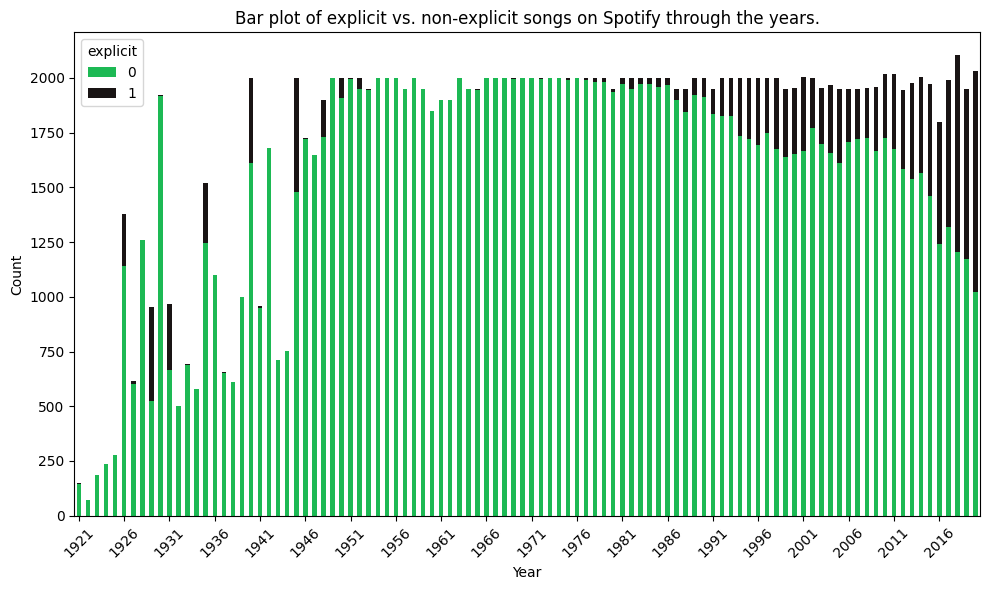

In [11]:
# Is there a relation between explicity and popularity?

# Plot stacked bar chart
main_df.groupby(["year", "explicit"]).size().unstack().plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    color=["#1db954", "#191414"]
)

plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Bar plot of explicit vs. non-explicit songs on Spotify through the years.")

ax = plt.gca()
xtick_labels = [tick.get_text() for tick in ax.get_xticklabels()]
ax.set_xticks([i for i in range(len(xtick_labels)) if i % 5 == 0])
ax.set_xticklabels([xtick_labels[i] for i in range(len(xtick_labels)) if i % 5 == 0], rotation=45)

plt.tight_layout()
plt.show()

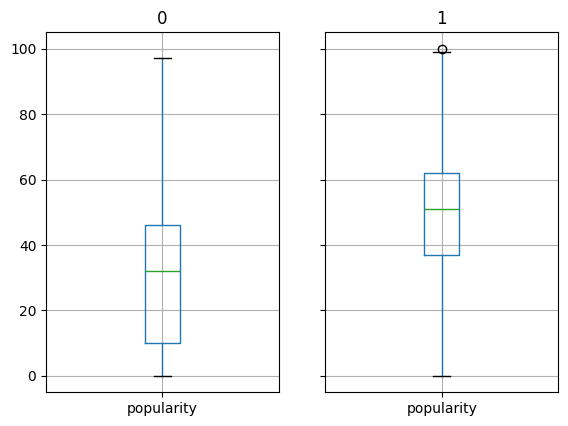

TtestResult(statistic=np.float64(-72.79204166688291), pvalue=np.float64(0.0), df=np.float64(16583.996846239228))

In [12]:
main_df.groupby("explicit").boxplot(column="popularity")
plt.show()

ttest_ind(main_df[main_df["explicit"] == 0]["popularity"], main_df[main_df["explicit"] == 1]["popularity"], equal_var=False)

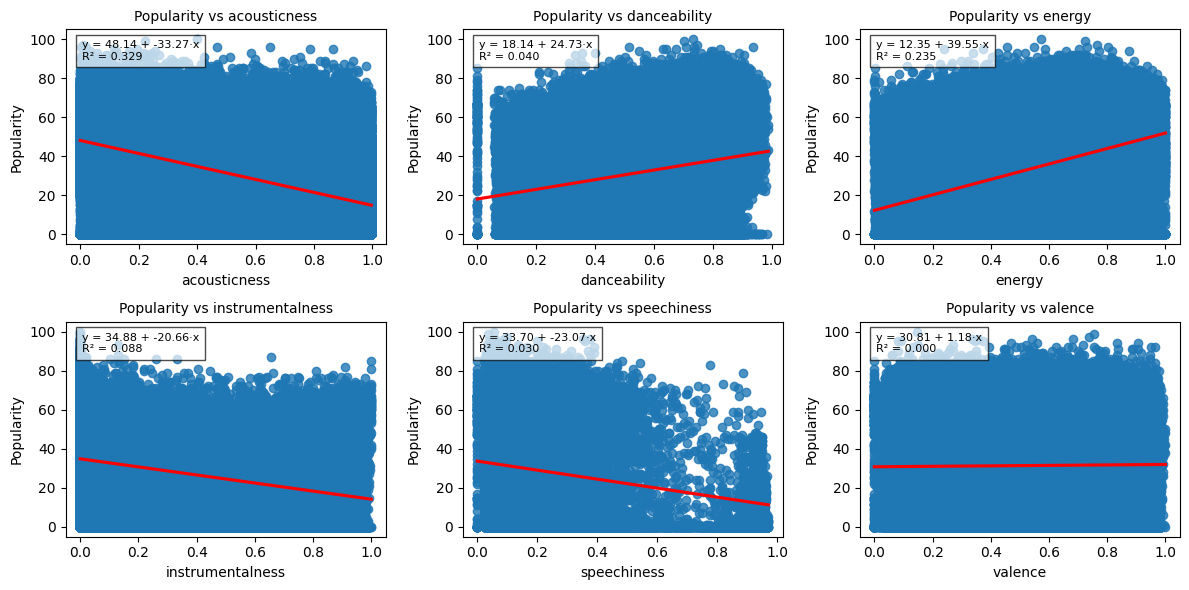

In [13]:
# Exclude 'popularity' from the list of independent variables
independent_vars = [col for col in arrElements if col != "popularity"]

# Set up a dynamic grid layout
n_cols = 3
n_rows = math.ceil(len(independent_vars) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(independent_vars):
    df = main_df[[col, 'popularity']].dropna()
    
    X = df[col]
    y = df['popularity']
    
    X_const = sm.add_constant(X)
    model = sm.OLS(y, X_const).fit()
    
    coef = model.params[col]
    intercept = model.params['const']
    r_squared = model.rsquared
    
    ax = axes[i]
    sns.regplot(x=col, y='popularity', data=df, line_kws={"color": "red"}, ax=ax)
    ax.set_title(f"Popularity vs {col}", fontsize=10)
    ax.set_xlabel(col)
    ax.set_ylabel("Popularity")
    
    ax.text(0.05, 0.95,
            f"y = {intercept:.2f} + {coef:.2f}·x\nR² = {r_squared:.3f}",
            transform=ax.transAxes,
            fontsize=8, verticalalignment='top',
            bbox=dict(facecolor='white', alpha=0.7))

# Remove any empty axes if there are fewer plots than grid slots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [14]:
df = main_df.copy()

# Keep only numerical variables
df = df.select_dtypes(include='number').dropna()

# Splitting X (regressors) and Y (response variable)
X = df.drop(columns='popularity')
y = df['popularity']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression
R²: 0.759
RMSE: 10.74

📌 Coefficients + P-Values Table:
         Feature  Coefficient  P-Value  StdErr
           const   -1288.7542   0.0000  3.2535
         valence       0.7177   0.0000  0.1601
            year       0.6694   0.0000  0.0016
    acousticness      -4.3742   0.0000  0.1361
    danceability       3.0191   0.0000  0.2325
     duration_ms      -0.0000   0.0460  0.0000
          energy      -2.3743   0.0000  0.2416
        explicit       0.9662   0.0000  0.1256
instrumentalness      -4.1196   0.0000  0.1093
             key      -0.0077   0.3596  0.0084
        loudness       0.0170   0.0663  0.0092
            mode      -0.2202   0.0008  0.0657
     speechiness      -8.3286   0.0000  0.2236
           tempo       0.0017   0.0895  0.0010



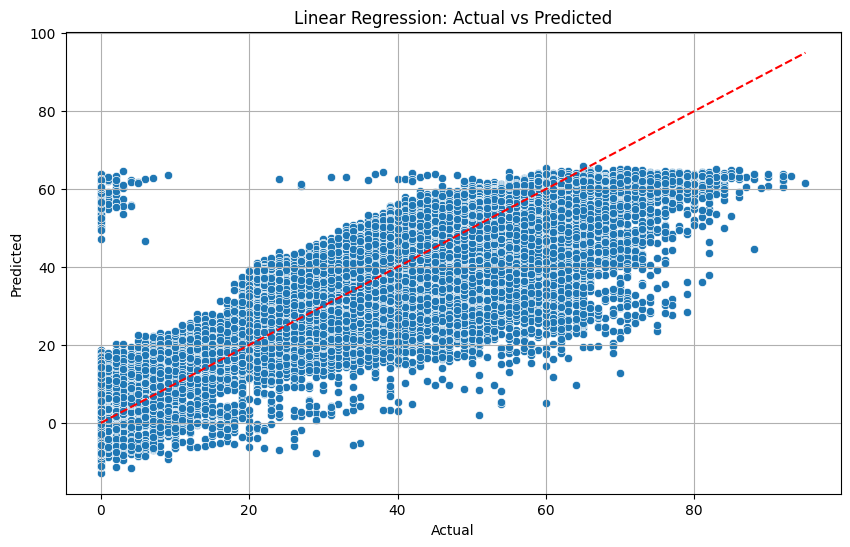

Cross-validated R²:
Mean: 0.752 | Std: 0.003
Cross-validated RMSE:
Mean: 10.87 | Std: 0.05


In [63]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


# Evaluate the model
print_bold("Linear Regression")
R_2_lr=r2_score(y_test, y_pred_lr)
print(f"R²: {R_2_lr:.3f}")

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
print(f"RMSE: {rmse_lr:.2f}")
print()

# Add a constant (intercept) 
X_train_sm = sm.add_constant(X_train)

# fit the OLS model
model = sm.OLS(y_train, X_train_sm).fit()

# Extract data from the model
summary_df = pd.DataFrame({
    'Feature': model.params.index,
    'Coefficient': model.params.values,
    'P-Value': model.pvalues.values,
    'StdErr': model.bse.values
})

print("📌 Coefficients + P-Values Table:")
print(summary_df.round(4).to_string(index=False))
print()


plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonale perfetta
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

# Cross-validated R²
scores_r2_lr = cross_val_score(lr, X_train, y_train, cv=5, scoring='r2')
print("Cross-validated R²:")
print(f"Mean: {scores_r2_lr.mean():.3f} | Std: {scores_r2_lr.std():.3f}")

# Cross-validated RMSE
scores_rmse_lr = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print("Cross-validated RMSE:")
print(f"Mean: {-scores_rmse_lr.mean():.2f} | Std: {scores_rmse_lr.std():.2f}")

Decision Tree Regression
R²: 0.619
RMSE: 13.50


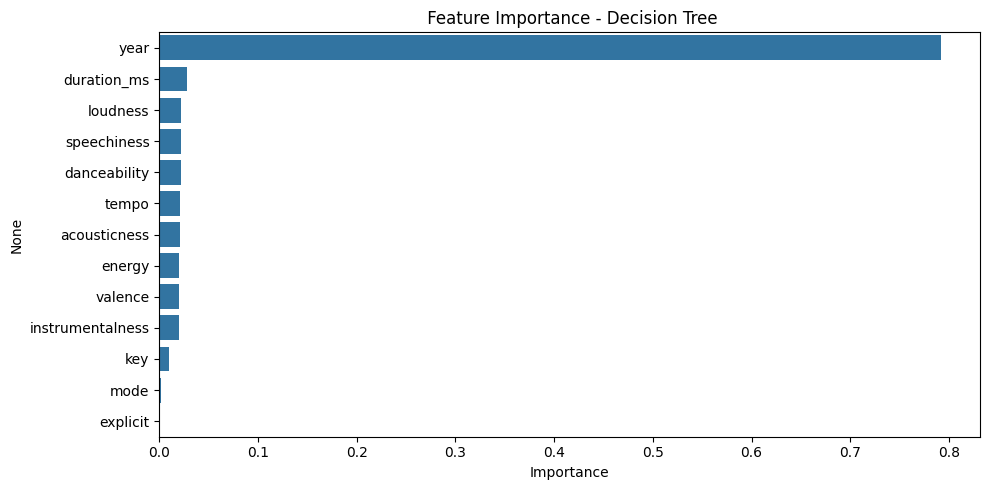

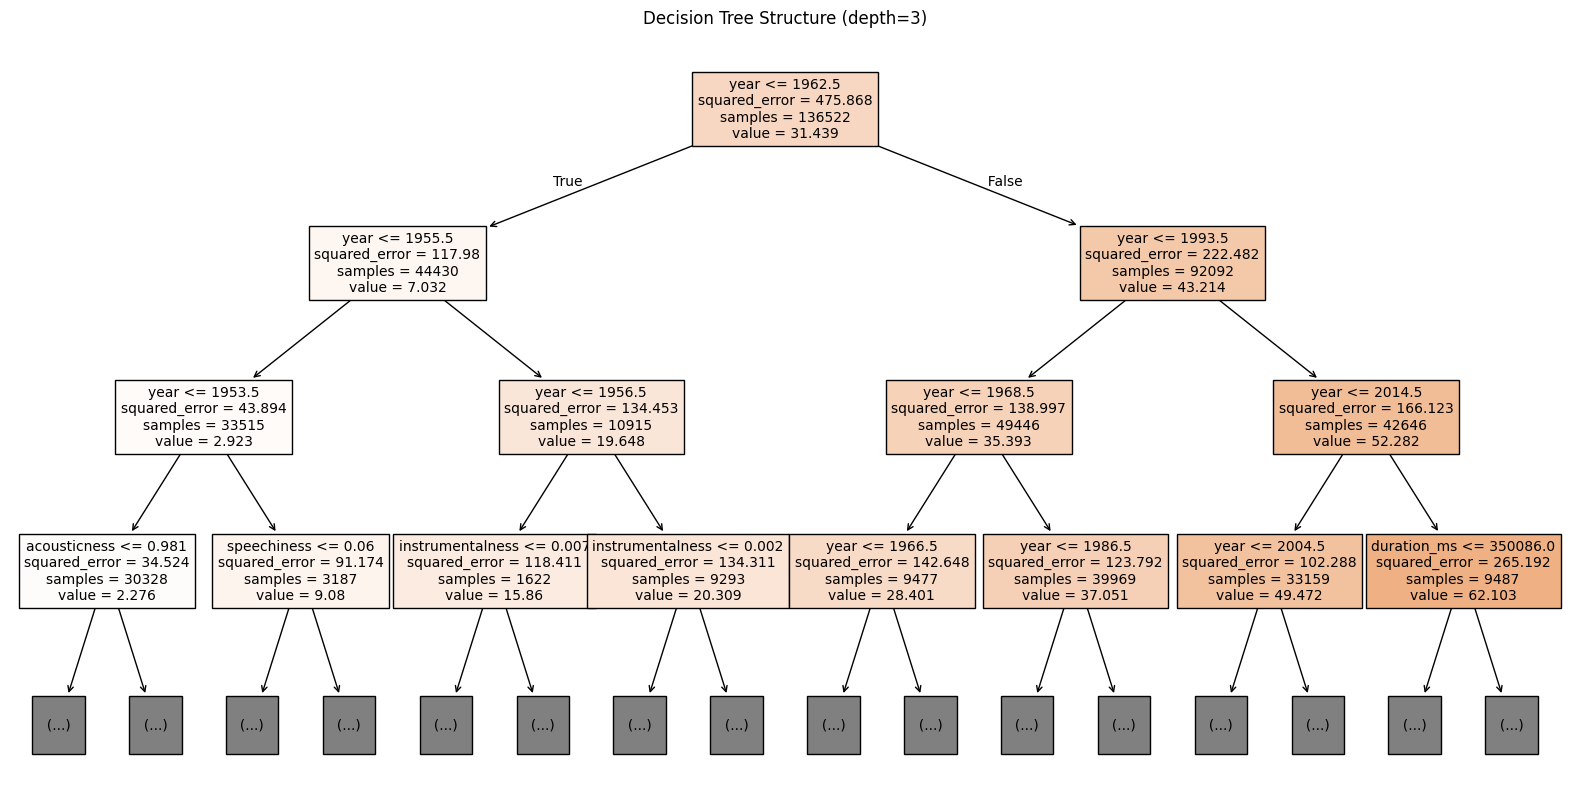

Decision Tree Cross-Validated R²:
Mean: 0.607 | Std: 0.004
Decision Tree Cross-Validated RMSE:
Mean: 13.67 | Std: 0.09


In [16]:
## Regression Tree

# Build and train regression tree model
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

# predictions
y_pred_tree = tree.predict(X_test)

r2_tree = r2_score(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)

print("Decision Tree Regression")
print(f"R²: {r2_tree:.3f}")
print(f"RMSE: {rmse_tree:.2f}")

# Features importance
importances = pd.Series(tree.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=importances.values, y=importances.index)
plt.title(" Feature Importance - Decision Tree")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, filled=True, max_depth=3, fontsize=10)
plt.title("Decision Tree Structure (depth=3)")
plt.show()

# Cross-validated R²
scores_r2_tree = cross_val_score(tree, X_train, y_train, cv=5, scoring='r2')
print("Decision Tree Cross-Validated R²:")
print(f"Mean: {scores_r2_tree.mean():.3f} | Std: {scores_r2_tree.std():.3f}")

# Cross-validated RMSE (negative, so we flip sign)
scores_rmse_tree = cross_val_score(tree, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print("Decision Tree Cross-Validated RMSE:")
print(f"Mean: {-scores_rmse_tree.mean():.2f} | Std: {scores_rmse_tree.std():.2f}")

Random Forest
R²: 0.809
RMSE: 9.55



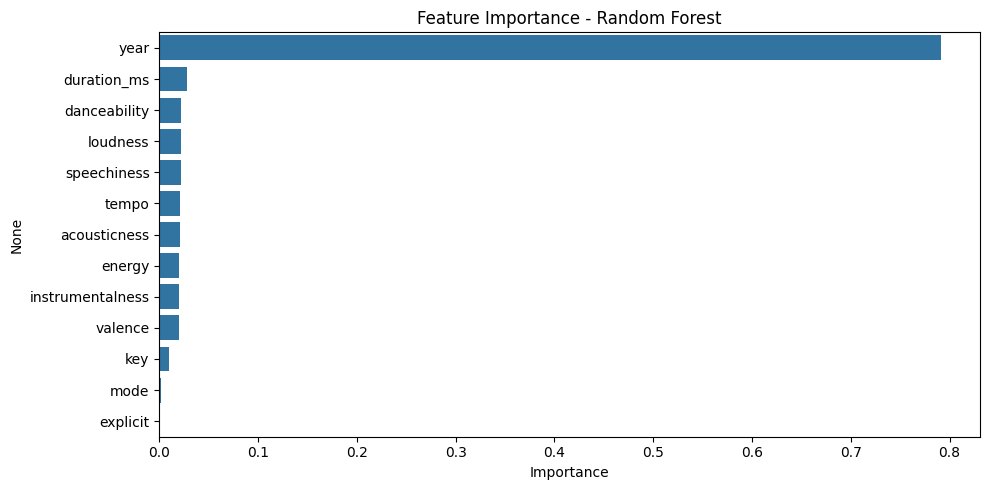

In [30]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest")
R_2_rf=r2_score(y_test, y_pred_rf)
print(f"R²: {R_2_rf:.3f}")

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print(f"RMSE: {rmse_rf:.2f}")
print()

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [55]:
# Normalization (KNN works better with scaled data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Interval of k to test
k_values = range(1, 31)
rmse_values = []
r2_values = []

for k in k_values:
    print(f"Testing k={k}")
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    rmse_values.append(rmse)
    r2_values.append(r2)

Testing k=1
Testing k=2
Testing k=3
Testing k=4
Testing k=5
Testing k=6
Testing k=7
Testing k=8
Testing k=9
Testing k=10
Testing k=11
Testing k=12
Testing k=13
Testing k=14
Testing k=15
Testing k=16
Testing k=17
Testing k=18
Testing k=19
Testing k=20
Testing k=21
Testing k=22
Testing k=23
Testing k=24
Testing k=25
Testing k=26
Testing k=27
Testing k=28
Testing k=29
Testing k=30


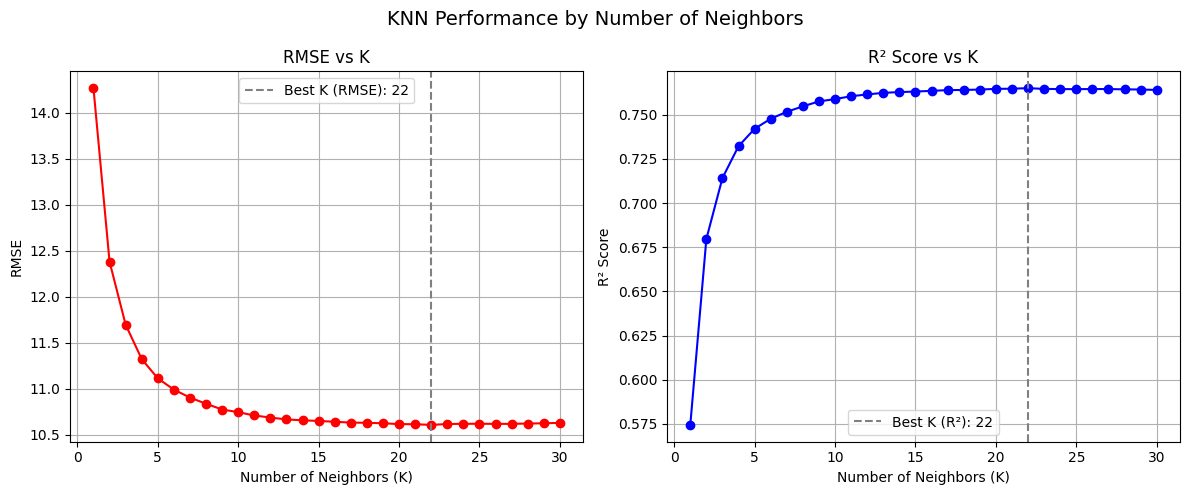

 Best K based on RMSE: 22 (RMSE = 10.60)
 Best K based on R²: 22 (R² = 0.765)


In [58]:
# Find the optimal k (min RMSE)
best_k_rmse = k_values[np.argmin(rmse_values)]
best_rmse_knn = min(rmse_values)

# Find the k with the best R²
best_k_r2 = k_values[np.argmax(r2_values)]
best_r2_knn = max(r2_values)

# plot
plt.figure(figsize=(12, 5))

# --- R² ---
plt.subplot(1, 2, 2)
plt.plot(k_values, r2_values, marker='o', color='blue')
plt.title("R² Score vs K")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("R² Score")
plt.grid(True)
plt.axvline(best_k_r2, color='gray', linestyle='--', label=f"Best K (R²): {best_k_r2}")
plt.legend()

# --- RMSE ---
plt.subplot(1, 2, 1)
plt.plot(k_values, rmse_values, marker='o', color='red')
plt.title("RMSE vs K")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("RMSE")
plt.grid(True)
plt.axvline(best_k_rmse, color='gray', linestyle='--', label=f"Best K (RMSE): {best_k_rmse}")
plt.legend()

plt.suptitle("KNN Performance by Number of Neighbors", fontsize=14)
plt.tight_layout()
plt.show()

# Output 
print(f" Best K based on RMSE: {best_k_rmse} (RMSE = {best_rmse:.2f})")
print(f" Best K based on R²: {best_k_r2} (R² = {best_r2:.3f})")

In [60]:
# Boosting

# Parameters to test
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize the model
xgb = XGBRegressor(random_state=42)

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best model from the search
best_model = grid_search.best_estimator_

# Evaluation on the test set
y_pred_xgb = best_model.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Test RMSE: {rmse:.2f}")
print(f"Test R² Score: {r2:.3f}")

# Optional: Additional cross-validation on best model
cv_rmse_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
cv_r2_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')

print(f"Cross-Validated RMSE (mean): {-cv_rmse_scores.mean():.2f}")
print(f"Cross-Validated R² (mean): {cv_r2_scores.mean():.3f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Test RMSE: 10.63
Test R² Score: 0.764
Cross-Validated RMSE (mean): 9.58
Cross-Validated R² (mean): 0.807


In [61]:
models = ['Linear\nRegression', 'Decision\nTree', 'Random\nForest', 'KNN', 'XGBoost']

# Corrispondent R² and RMSE 
r2_scores = [R_2_lr, r2_tree, R_2_rf, best_r2_knn, r2_xgb]
rmse_scores = [rmse_lr, rmse_tree, rmse_rf, best_rmse_knn, rmse_xgb]

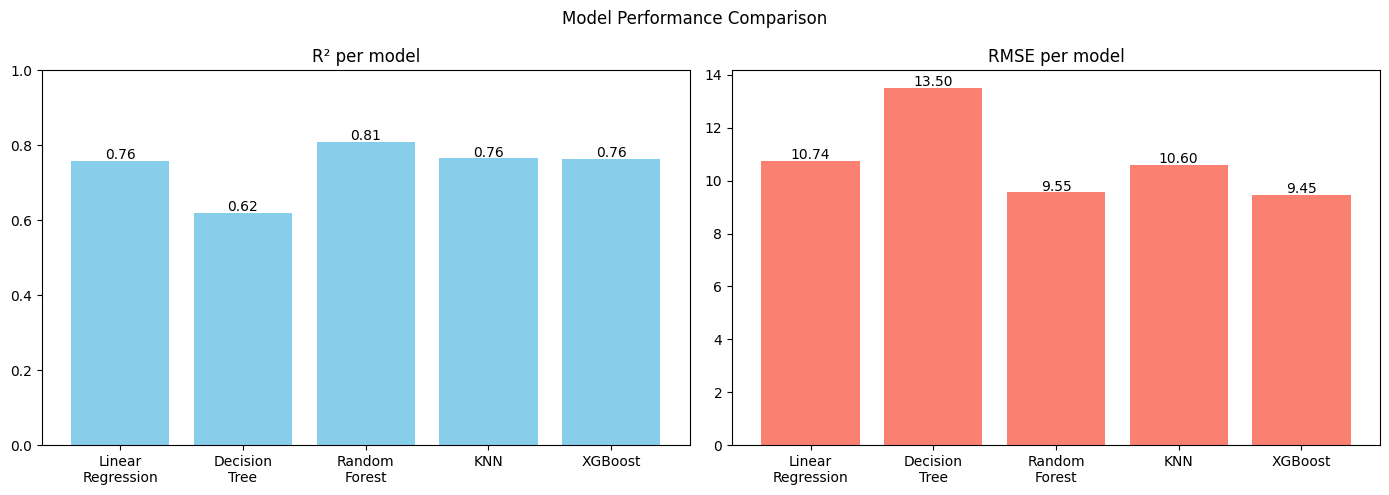

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- R² ---
axes[0].bar(models, r2_scores, color='skyblue')
axes[0].set_title("R² per model")
axes[0].set_ylim(0, 1)
for i, val in enumerate(r2_scores):
    axes[0].text(i, val + 0.005, f"{val:.2f}", ha='center', color='black', fontsize=10)

# --- RMSE ---
axes[1].bar(models, rmse_scores, color='salmon')
axes[1].set_title("RMSE per model")
rmse_max = max(rmse_scores)
for i, val in enumerate(rmse_scores):
    axes[1].text(i, val + rmse_max * 0.005, f"{val:.2f}", ha='center', color='black', fontsize=10)

# Overall title
plt.suptitle("Model Performance Comparison")
plt.tight_layout()
plt.show()

In [22]:
# Setup
features = [
    'valence', 'danceability', 'energy', 'speechiness',
    'acousticness', 'instrumentalness', 'tempo', 'loudness'
]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(main_df[features])
main_df['original_index'] = main_df.index

Overall relevance score of the features:
energy              0.434103
acousticness        0.433331
loudness            0.419896
valence             0.399479
danceability        0.398107
instrumentalness    0.370840
tempo               0.310675
speechiness         0.273424
dtype: float64


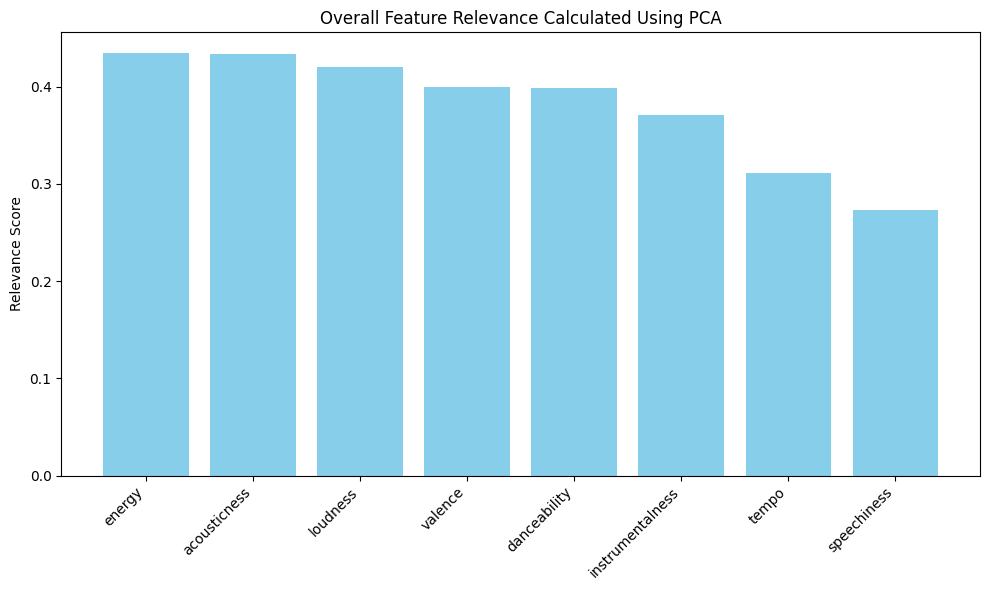

In [29]:
# Calculate weights using PCA
pca = PCA()
pca.fit(X_scaled)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
df_loadings = pd.DataFrame(loadings, index=features)
df_abs_loadings = df_loadings.abs()
explained_variance_ratio = pca.explained_variance_ratio_
weights = explained_variance_ratio
relevance_scores = df_abs_loadings.multiply(weights, axis=1).sum(axis=1)
weights_normalized = relevance_scores / relevance_scores.max()

# Sort the relevance scores in descending order
relevance_scores_sorted = relevance_scores.sort_values(ascending=False)

print("Overall relevance score of the features:")
print(relevance_scores_sorted)

plt.figure(figsize=(10, 6))
plt.bar(relevance_scores_sorted.index, relevance_scores_sorted.values, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Relevance Score')
plt.title('Overall Feature Relevance Calculated Using PCA')
plt.tight_layout()
plt.show()


In [24]:
# weighted cosine similarity function
def weighted_cosine_similarity(vec1, vec2, weights):
    weighted_vec1 = vec1 * weights
    weighted_vec2 = vec2 * weights
    sim = np.dot(weighted_vec1, weighted_vec2) / (np.linalg.norm(weighted_vec1) * np.linalg.norm(weighted_vec2))
    return sim

In [25]:
# Recommendation function
def recommend_by_title(title, n_recommendations=20, alpha_pop=0.05, alpha_year=0.01):
    matches = main_df[main_df['name'].str.lower() == title.lower()]
    if matches.empty:
        return f"Song '{title}' not found."
    
    idx = matches.iloc[0]['original_index']
    target_vec = X_scaled[idx]
    target_year = matches.iloc[0]['year']
    
    similarities = []
    for i, row in main_df.iterrows():
        sim = weighted_cosine_similarity(target_vec, X_scaled[i], weights_normalized.values)
        
        # Normalized popularity (0-1) and weighted by alpha_pop
        pop_norm = (row['popularity'] - main_df['popularity'].min()) / (main_df['popularity'].max() - main_df['popularity'].min())
        pop_score = 1 + alpha_pop * pop_norm
        
        # Year: the closer to the target, the higher the score (exponential decay)
        year_diff = abs(row['year'] - target_year)
        year_score = 1 + alpha_year * np.exp(-year_diff / 5)
        
        final_score = sim * pop_score * year_score
        similarities.append((i, final_score))
    
    # Sort by descending score
    similarities = sorted(similarities, key=lambda x: x[1], reverse=True)
    
    # Exclude the input song itself
    recommended_indices = [i for i, score in similarities if i != idx][:n_recommendations]
    
    return main_df.iloc[recommended_indices][['name', 'artists', 'year', 'popularity']]


In [26]:
def plot_song_features_radar_normalized(song_row, features, main_df):
    # Exclude 'tempo' since you want to leave it out
    features_to_plot = [f for f in features if f != 'tempo']
    
    # Normalize all rows in the dataframe for these features to a 0–10 range
    scaler = MinMaxScaler(feature_range=(0, 10))
    scaled_features = scaler.fit_transform(main_df[features_to_plot])
    
    # Get the index of the selected song in the dataframe
    idx = song_row.name  # song_row must be a row from df_clean, so .name gives the index
    
    # Normalized values of the selected song
    normalized_values = scaled_features[idx]
    
    # Prepare data for radar plot (close the circle)
    num_vars = len(features_to_plot)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    normalized_values = np.concatenate((normalized_values, [normalized_values[0]]))
    angles += angles[:1]
    
    # Song info
    name = song_row['name'].upper()
    artists = ', '.join(eval(song_row['artists'])) if isinstance(song_row['artists'], str) else str(song_row['artists'])
    year = song_row['year']
    popularity = song_row['popularity']
    
    # Plot
    fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
    ax.plot(angles, normalized_values, color='coral', linewidth=2)
    ax.fill(angles, normalized_values, color='coral', alpha=0.25)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features_to_plot, fontsize=10)
    
    ax.set_ylim(0, 10)
    ax.set_yticks(range(0, 11, 2))
    ax.set_yticklabels([str(i) for i in range(0, 11, 2)])
    
    plt.title(f"{name} by {artists} ({year})\nPopularity score: {popularity}", size=14, y=1.1)
    plt.tight_layout()
    plt.show()


In [50]:
def plot_comparison_radar(song_row1, song_row2, features, df_clean):
    # Remove 'tempo' 
    features_to_plot = [f for f in features if f != 'tempo']
    
    # Normalize to [0–10] across the entire df_clean
    scaler = MinMaxScaler(feature_range=(0, 10))
    scaled_features = scaler.fit_transform(df_clean[features_to_plot])
    
    # Extract indices and normalized values
    idx1 = song_row1.name
    idx2 = song_row2.name
    val1 = scaled_features[idx1]
    val2 = scaled_features[idx2]
    
    # Close the circle for the radar plot
    num_vars = len(features_to_plot)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    val1 = np.concatenate((val1, [val1[0]]))
    val2 = np.concatenate((val2, [val2[0]]))
    angles += angles[:1]
    
    # Song information
    def format_song_title(row):
        name = row['name'].upper()
        artist = ', '.join(eval(row['artists'])) if isinstance(row['artists'], str) else str(row['artists'])
        return f"{name} by {artist} ({row['year']})"
    
    title1 = format_song_title(song_row1)
    title2 = format_song_title(song_row2)
    
    # Plot
    fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(polar=True))
    ax.plot(angles, val1, color='coral', linewidth=2, label=title1)
    ax.fill(angles, val1, color='coral', alpha=0.25)
    
    ax.plot(angles, val2, color='skyblue', linewidth=2, label=title2)
    ax.fill(angles, val2, color='skyblue', alpha=0.25)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features_to_plot, fontsize=10)
    ax.set_ylim(0, 10)
    ax.set_yticks(range(0, 11, 2))
    ax.set_yticklabels([str(i) for i in range(0, 11, 2)])
    ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1.15), fontsize=8, ncol=1)
    plt.subplots_adjust(top=0.85)
    
    # plt.title("Song Feature Comparison", size=14, y=1.1)
    ax.legend(loc='right', bbox_to_anchor=(1.1, 1.1), fontsize=8)
    plt.tight_layout()
    plt.show()


Enter the artist's name:  daft punk



Songs found for artist 'daft punk':

0: Adagio For TRON
1: Aerodynamic
2: Aerodynamic - Daft Punk Remix
3: Alive
4: Arena
5: Armory
6: Around the World
7: Around the World - Radio Edit [Radio Edit]
8: Around the World / Harder, Better, Faster, Stronger
9: Burnin'
10: Burnin' - Edit Version [Edit Version]
11: C.L.U.
12: Contact
13: Crescendolls
14: Da Funk
15: Daftendirekt
16: Derezzed - From "TRON: Legacy"/Score
17: Derezzed - Remixed by The Glitch Mob
18: Digital Love
19: Disc Wars
20: Doin' it Right (feat. Panda Bear)
21: End of Line
22: Face to Face
23: Fall
24: Flynn Lives
25: Fragments of Time (feat. Todd Edwards)
26: Fresh
27: Get Lucky (feat. Pharrell Williams & Nile Rodgers)
28: Get Lucky (feat. Pharrell Williams & Nile Rodgers) - Radio Edit
29: Giorgio by Moroder
30: Give Life Back to Music
31: Harder, Better, Faster, Stronger
32: High Fidelity
33: High Life
34: Human After All
35: I Feel It Coming
36: Indo Silver Club
37: Instant Crush (feat. Julian Casablancas)
38: Lose You


Choose the index of the song:  72


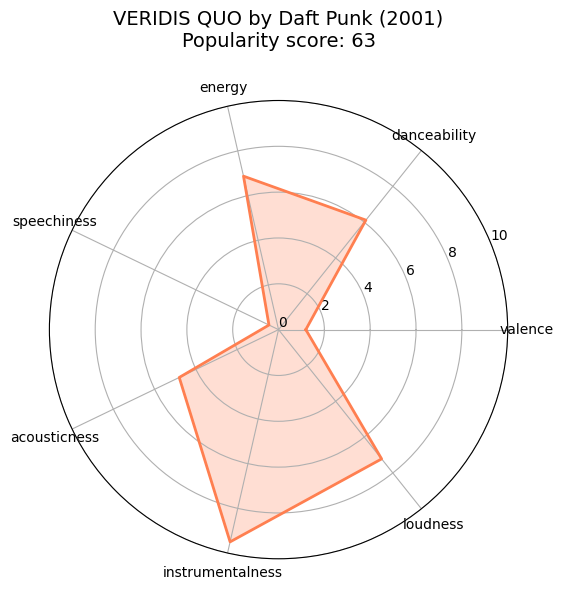


🎵 Recommended playlist based on: 'Veridis Quo'

1) GOLDEN LIGHT by STRFKR (2013)
2) MOTHERBOARD by Daft Punk (2013)
3) A GREAT DESIGN by Black Marble (2012)
4) RINZLER by Daft Punk (2010)
5) THE ONE WITH THE WURLITZER by American Football (1999)
6) DOCKING THE POD by Duster (1998)
7) SNAKE SONG by Isobel Campbell, Mark Lanegan (2010)
8) INTRO by The xx (2009)
9) MOON (AND IT WENT LIKE) by Kid Francescoli (2017)
10) SLEEPY HERBS by Ole Lukkoye (2012)
11) FORTUNE DAYS by The Glitch Mob (2010)
12) CHIRP by C418 (2013)
13) THE GAME HAS CHANGED by Daft Punk (2010)
14) PIMPF - 2006 REMASTER by Depeche Mode (1987)
15) VOYAGER by Daft Punk (2001)
16) PARIS by M|O|O|N (2011)
17) GIRL by salvia palth (2013)
18) THAT'S THE WAY LOVE GOES by Norman Brown (1994)
19) EQUINOXE, PT. 4 by Jean-Michel Jarre (1978)
20) IN DREAMS by Ben Howard (2014)

Generating radar plots for comparisons...



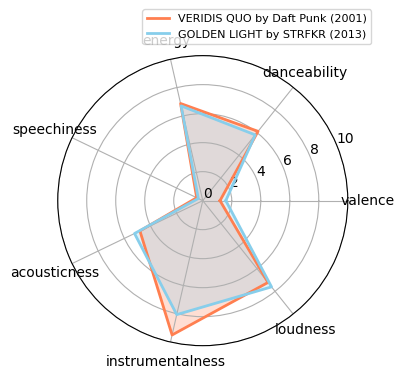

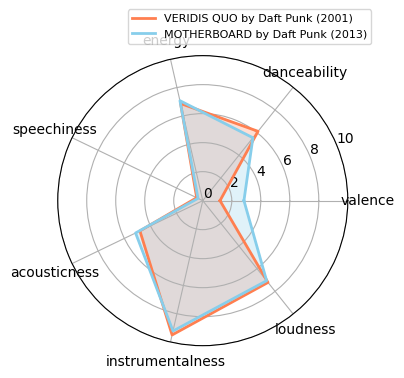

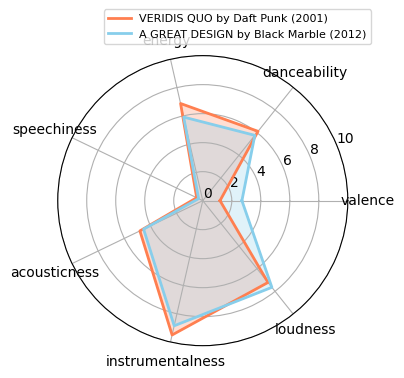

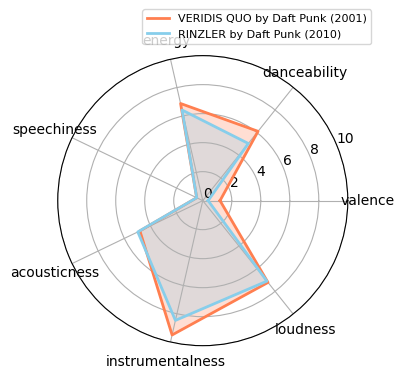

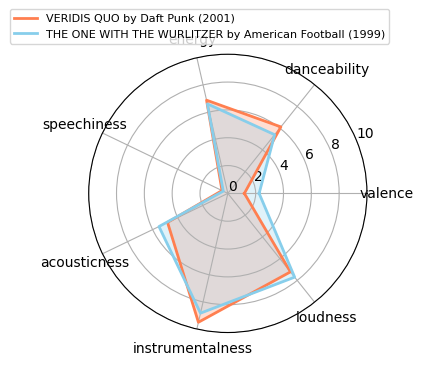

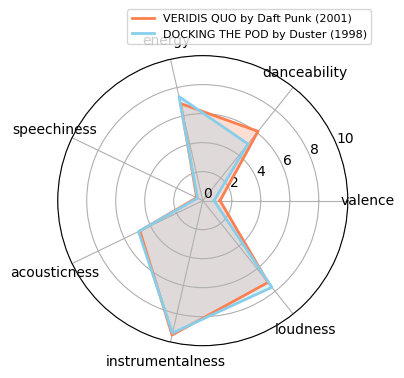

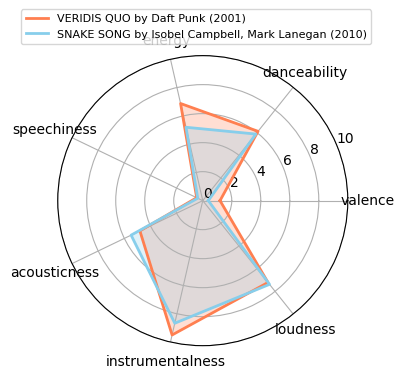

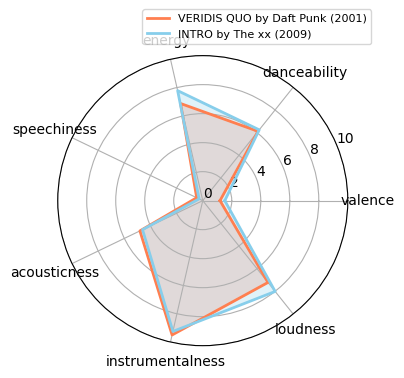

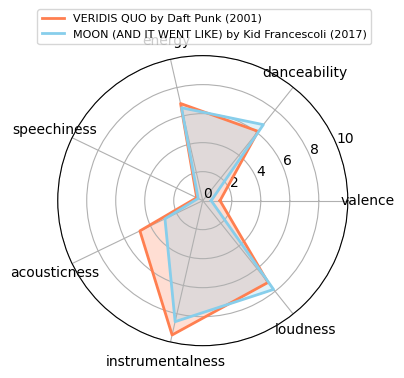

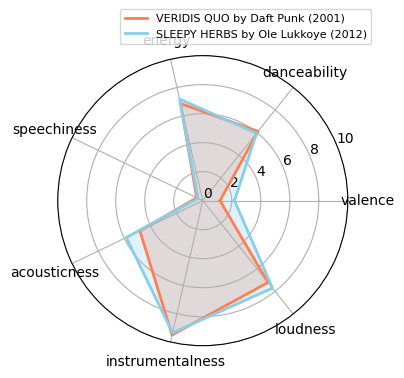

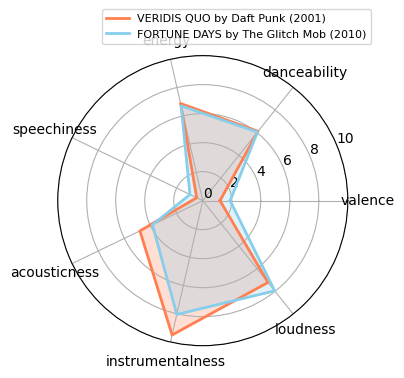

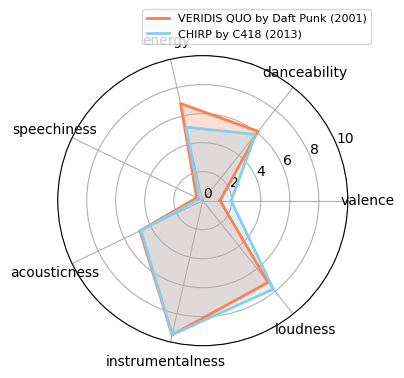

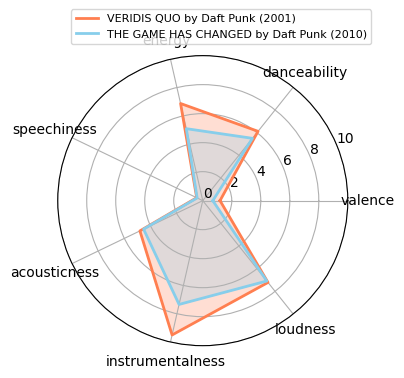

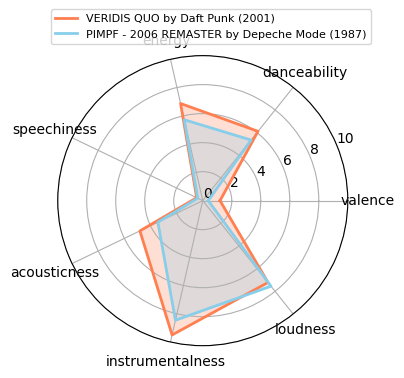

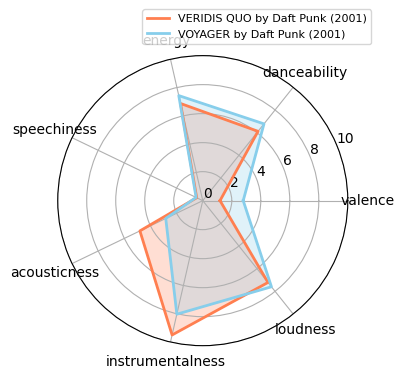

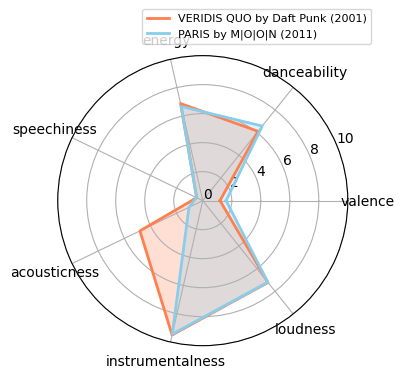

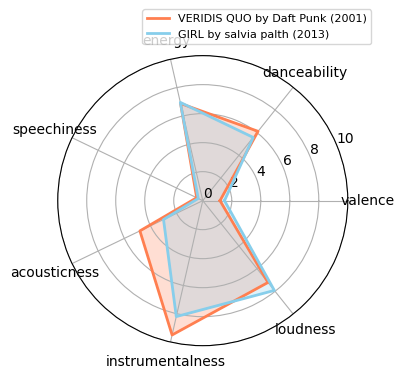

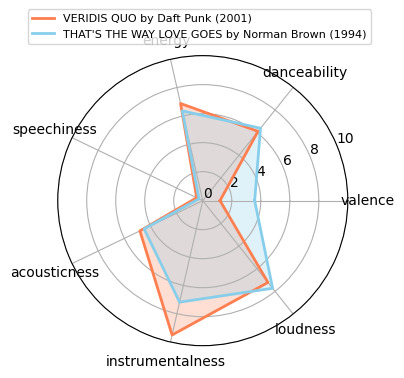

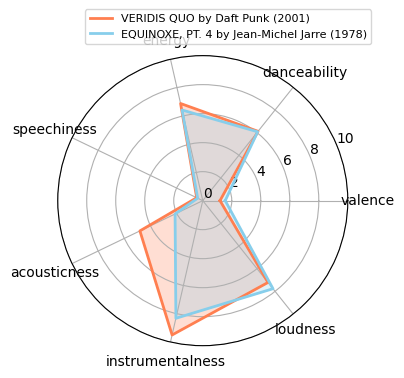

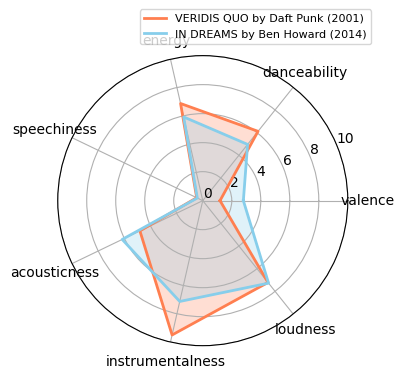

In [51]:
# User Interaction

# 1. Ask user to input an artist name
input_artist = input("Enter the artist's name: ").lower()

# 2. Filter songs by artist name
main_df['artist_str'] = main_df['artists'].astype(str).str.lower()
artist_songs = main_df[main_df['artist_str'].str.contains(artista_input, na=False)]

# 3. If no songs found, notify the user
if artist_songs.empty:
    print(f"No songs found for artist '{input_artist}'.")
else:
    # 4. Show found songs
    print(f"\nSongs found for artist '{input_artist}':\n")
    
    songs_list = sorted(artist_songs['name'].dropna().unique())

    for i, title in enumerate(songs_list):
        print(f"{i}: {title}")
    
    # 5. Ask user to choose a song
    choice = int(input("\nChoose the index of the song: "))
    chosen_title = songs_list[choice]

    # 6. Get the selected song row
    chosen_song_row = main_df[main_df['name'].str.lower() == chosen_title.lower()].iloc[0]

    # 7. Plot radar chart of selected song
    plot_song_features_radar_normalized(chosen_song_row, features, main_df)

    # 8. Generate playlist recommendations
    playlist = recommend_by_title(chosen_title)

    if isinstance(playlist, str):
        print(playlist)
    else:
        print(f"\n🎵 Recommended playlist based on: '{chosen_title}'\n")

        # 9. Reset index to keep original index as column
        playlist = playlist.reset_index()

        # 10. Print recommended songs first (only names)
        for i, row in playlist.iterrows():
            name = row['name'].upper()
            artists = ', '.join(eval(row['artists'])) if isinstance(row['artists'], str) else str(row['artists'])
            year = row['year']
            print(f"{i + 1}) {name} by {artists} ({year})")

        # 11. After printing, show radar comparisons
        print("\nGenerating radar plots for comparisons...\n")
        for _, row in playlist.iterrows():
            recommended_row = main_df.loc[row['index']]
            plot_comparison_radar(chosen_song_row, recommended_row, features, main_df)